In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
def mse(Y,P):
    '''Mean Square Error'''
    return 0.5*(np.mean((Y - P)**2))

def lin_func(X, w):
    '''Linear function'''
    return (w[1]*X + w[0])


def lin_reg(X, Y, eta, epsilon, w, plot=True):
    '''
    X:         input vector
    Y:         output vector
    eta:       learning rate
    epsilon:   termination variable
    w:         weight vector
    '''
    mseVector = []
    gradient = np.zeros(2)
    
    for _ in range(100000):
        #Prediction
        P = lin_func(X, w)
        mseVector.append(mse(Y,P))
        
        #calculate gradient
        gradient[0] = np.mean(P-Y)
        gradient[1] = np.mean((P-Y)*X)
        
        #check termination criteria
        #if (eta * np.linalg.norm(gradient) < epsilon):
            #break
            
        #update weight vector
        w -= eta * gradient
        #print("weight",w)
        #eta *= 0.9
    
    print(w)
    if plot:
        #plotting
        plt.figure(figsize=(20, 10))
        plt.title("TV Sales", size=20)
        plt.xlabel("TVs sold in 1000", size=20)
        plt.ylabel("Advertising costs in 1000$", size=20)
        plt.xlim([-50,350])
        plt.ylim([0,30])
        plt.scatter(X,Y)
        l = np.linspace(-50,350)
        plt.plot(l,lin_func(l,w), color="red")
        plt.show()
    
    return (w, mseVector)

[4.94442841 0.05814087]


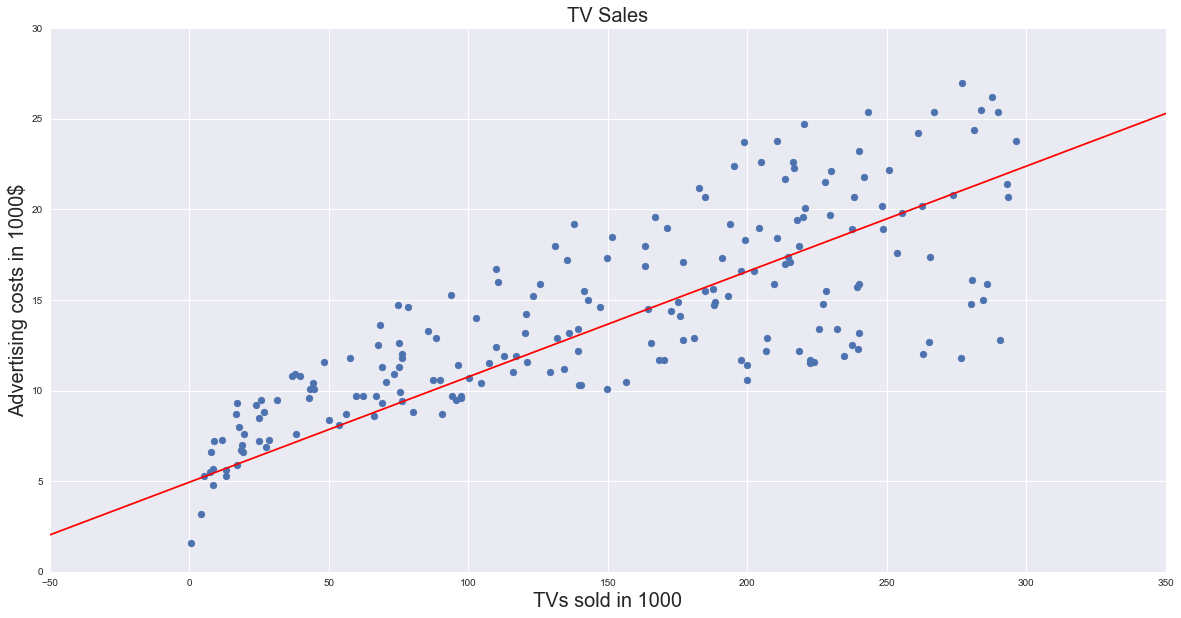

In [3]:
df=pd.read_csv('tvads.csv', sep=';',header=0)
tv = np.asanyarray(df.iloc[:,0])
sales = np.asanyarray(df.iloc[:,1])

w =np.ones(2)*(-5)
(fitted_w, mseVector) = lin_reg(tv, sales, 0.00006906, 0.00000001, w)

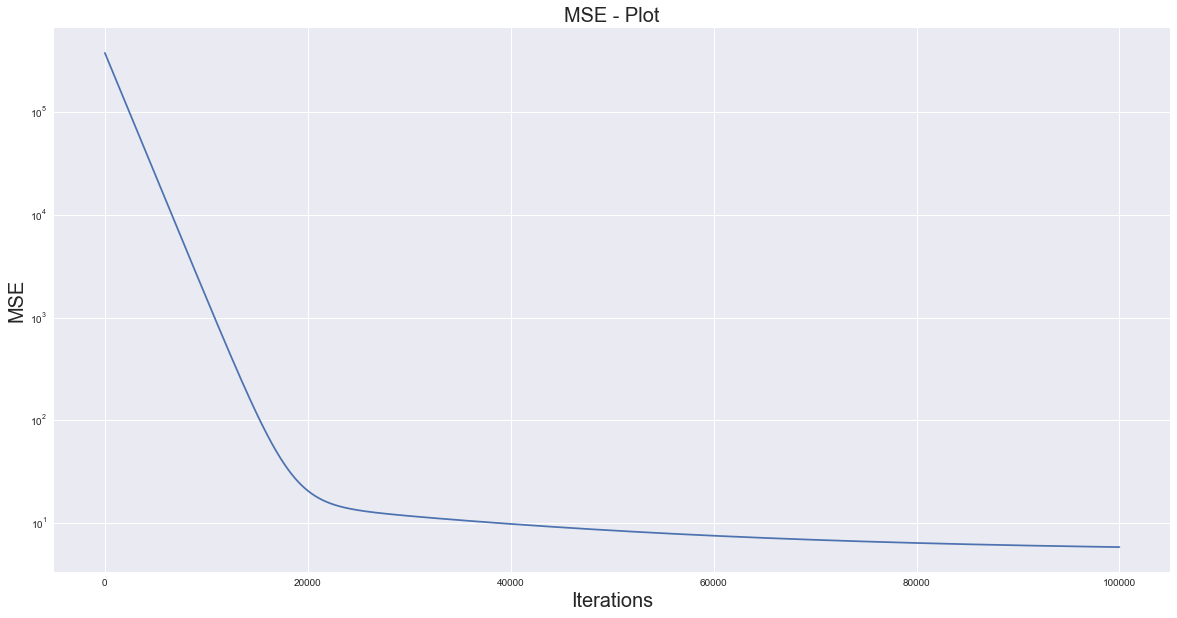

In [4]:
plt.figure(figsize=(20, 10))
plt.title("MSE - Plot", size=20)
plt.xlabel("Iterations", size=20)
plt.ylabel("MSE", size=20)
plt.semilogy(mseVector)

[nan nan]
[-1.76372965  0.09220658]
[5.46351753 0.0555048 ]


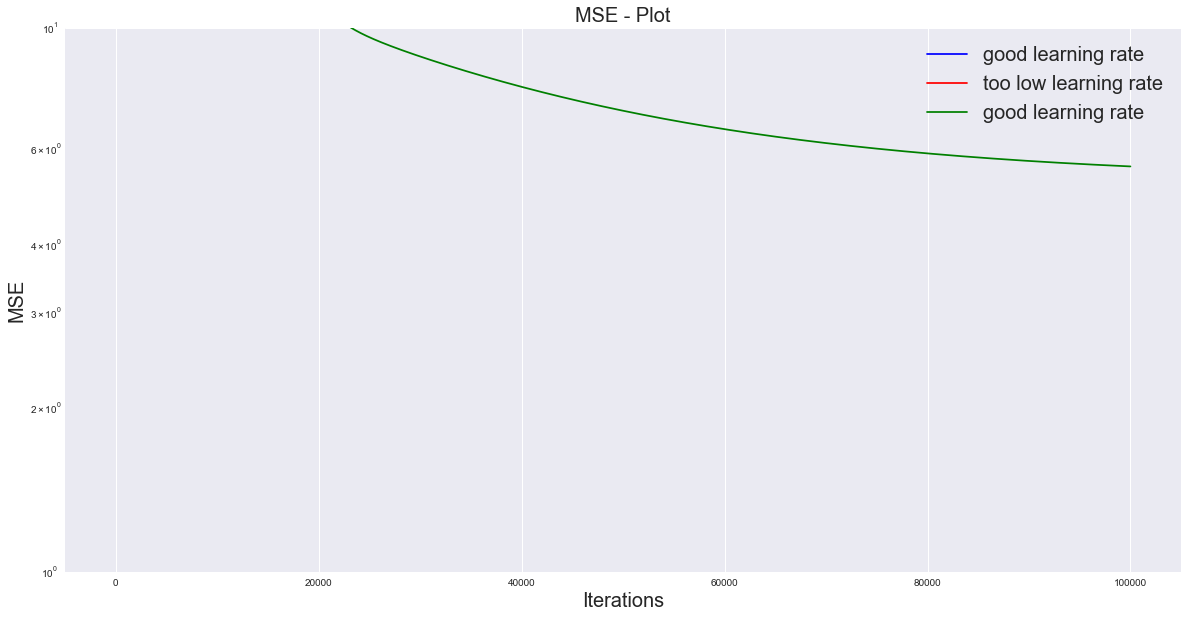

In [6]:
w =np.ones(2)*(-2)
(fitted_w, mseVector) = lin_reg(tv, sales, 0.00007, 0.0001, w, False)

w =np.ones(2)*(-2)
(fitted_w, mseVector2) = lin_reg(tv, sales, 0.000001, 0.0001, w, False)

w =np.ones(2)*(-2)
(fitted_w, mseVector3) = lin_reg(tv, sales, 0.00006906, 0.0001, w, False)

plt.figure(figsize=(20, 10))
plt.title("MSE - Plot", size=20)
plt.xlabel("Iterations", size=20)
plt.ylabel("MSE", size=20)
#plt.ylim([0,10**22])
#plt.xlim([0,50])
plt.semilogy(mseVector, c='blue', label="good learning rate")
plt.semilogy(mseVector2, c='red', label="too low learning rate")
plt.semilogy(mseVector3, c='green', label="good learning rate")
plt.legend(fontsize=20)